# Clip and Sharpen

## Setting up

In [1]:
import rasterio
from rasterio.plot import show
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = 0, 1000
    new_array = ((array - array_min)/(array_max - array_min))
    new_array[new_array > 1] = 1
    new_array[new_array < 0] = 0
    return new_array

def rgb_composite(raster_file):
    raster = rasterio.open(raster_file)

    red = raster.read(1)
    green = raster.read(2)
    blue = raster.read(3)

    # Normalize the bands
    redn = normalize(red)
    greenn = normalize(green)
    bluen = normalize(blue)
    # Create RGB natural color composite
    rgb = np.dstack((redn, greenn, bluen))
    return rgb

## Images

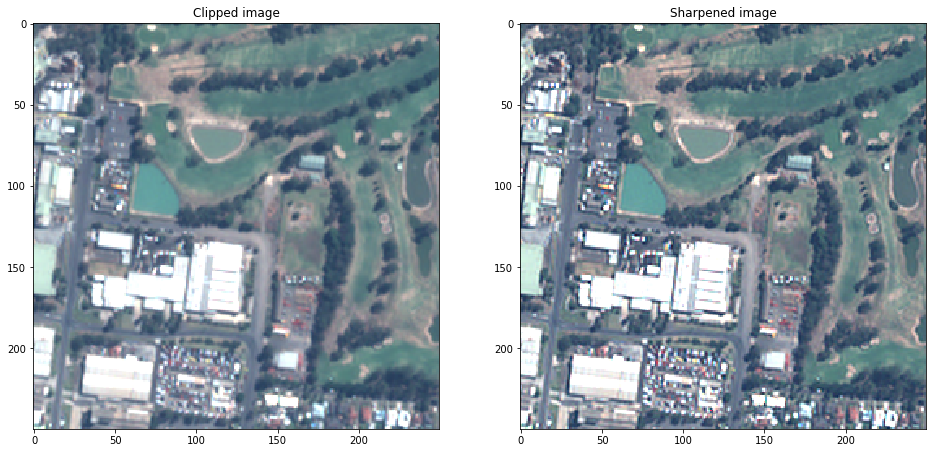

In [2]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(121)
ax1.imshow(rgb_composite("cropped.tif"))
ax1.set_title('Clipped image')
ax2 = fig.add_subplot(122)
ax2.imshow(rgb_composite("high_pass.tif"))
ax2.set_title('Sharpened image')
plt.show()